In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
import scipy.stats as stats

In [3]:
!ls

cramer.png  EDA.ipynb  README.md  telco.xls


In [4]:
df=pd.read_csv("telco.xls")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
l=[]
for j in df['TotalCharges']:
    try : 
        l.append(float(j))
    except:
        print(j)

In [9]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [10]:
def missing_data_function(frame):
        total = frame.isnull().sum().sort_values(ascending=False)
        percent = (frame.isnull().sum()*100 / frame.isnull().count()).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        return missing_data

In [96]:
missing_data_function(df)

,Total,Percent
charge_tenure,0,0.0
Churn,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0


In [97]:
df = df[df["TotalCharges"].notnull()]

In [13]:
df.shape

(7032, 21)

In [14]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [15]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [16]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [17]:
pd.crosstab(df.Churn,df.gender)

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


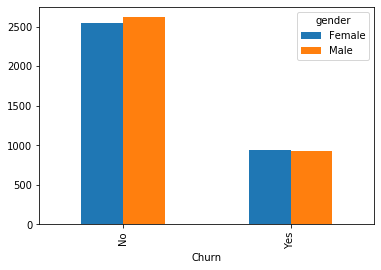

In [18]:
pd.crosstab(df.Churn,df.gender).plot(kind="bar")

In [19]:
pd.crosstab(df.Churn,df.Partner)

Partner,No,Yes
Churn,,
No,2439,2724
Yes,1200,669


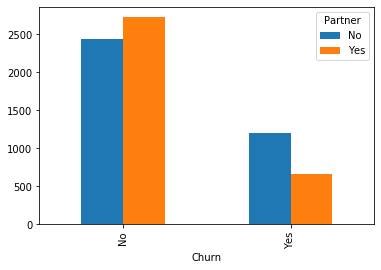

In [20]:
pd.crosstab(df.Churn,df.Partner).plot(kind="bar")

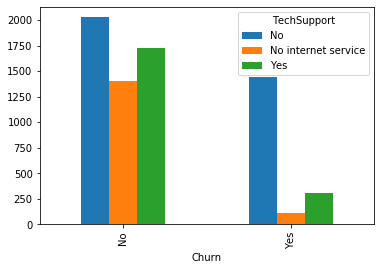

In [21]:
pd.crosstab(df.Churn,df.TechSupport).plot(kind="bar")

In [22]:
pd.crosstab(df.Churn,df.StreamingTV)

StreamingTV,No,No internet service,Yes
Churn,,,
No,1867,1407,1889
Yes,942,113,814


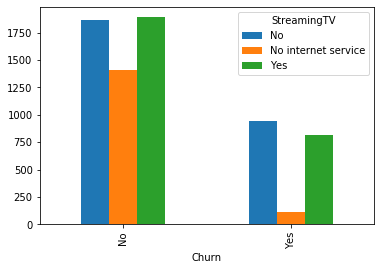

In [23]:
pd.crosstab(df.Churn,df.StreamingTV).plot(kind="bar")

In [24]:
pd.crosstab(df.Churn,df.Contract)

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1306,1637
Yes,1655,166,48


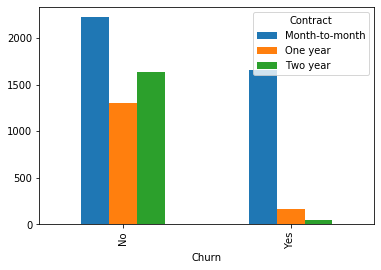

In [25]:
pd.crosstab(df.Churn,df.Contract).plot(kind="bar")

In [26]:
pd.crosstab(df.Churn,df.Contract,margins=True)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1306,1637,5163
Yes,1655,166,48,1869
All,3875,1472,1685,7032


In [27]:
cross=pd.crosstab(df.Churn,df.Contract,margins=True)
cross["All"]['All']

7032

![cramer.png](cramer.png)

In [28]:
def corr(variable):
    cross=pd.crosstab(df["Churn"],df[variable],margins=True)
    chi=0
    for i in df[variable].unique():
        for j in df['Churn'].unique():
            e=cross[i]['All']*cross['All'][j]/cross['All']['All']
            chi=chi+((cross[i][j]-e)**2/e)
    free_deg=min((df[variable].nunique()-1),(df['Churn'].nunique()-1))
    p=math.sqrt(chi/(cross['All']['All']*free_deg))
    return p 
    


In [29]:
corr('Contract')

0.4095604189089921

In [30]:
categoricals=df.select_dtypes(include='object').drop(["Churn","customerID"],axis=1).keys()

In [31]:
categoricals

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [32]:
chi_dict={}
for cal in categoricals:
    chi_dict[cal]=corr(cal)

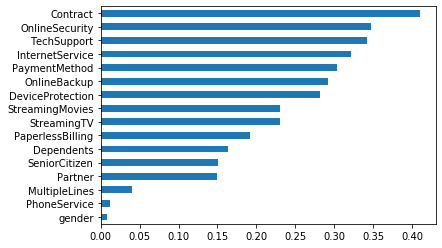

In [33]:
pd.Series(data=chi_dict).sort_values().plot(kind='barh')

for more details on entropy and information gain 
check the link : [entropy_and_information_gain](https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134)

In [34]:
def information_gain(cal):
    Class_target=df["Churn"].unique()
    all_points=df.shape[0]
    start_entropy=-sum([(df["Churn"].value_counts(normalize=True)[c])*math.log2(df["Churn"].value_counts(normalize=True)[c]) for c in Class_target ])
    Class_variable=df[cal].unique()
    end_entropy=0
    for c in Class_variable:
        sub_df=df[df[cal]==c]
        all_points_variable=sub_df.shape[0]
        end_entropy += - (all_points_variable/all_points) * sum([(sub_df["Churn"].value_counts(normalize=True)[c])*math.log2(sub_df["Churn"].value_counts(normalize=True)[c]) for c in Class_target ])
    return start_entropy - end_entropy

In [35]:
from IPython.display import YouTubeVideo

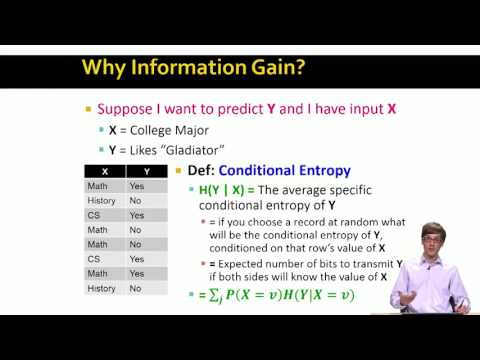

In [36]:
YouTubeVideo('wNhnAogeHJQ', width=800, height=300)

In [37]:
information_gain("Contract")

0.14164697191442988

In [38]:
entropy_dict={}
for cal in categoricals:
    entropy_dict[cal]=information_gain(cal)

In [39]:
entropy_dict

{'gender': 5.2664627444909407e-05,
 'SeniorCitizen': 0.015195365435384356,
 'Partner': 0.016422410868688675,
 'Dependents': 0.02058772856974811,
 'PhoneService': 9.975388225258452e-05,
 'MultipleLines': 0.0011517851035277582,
 'InternetService': 0.07991620703249047,
 'OnlineSecurity': 0.09309457404253474,
 'OnlineBackup': 0.06731469992811256,
 'DeviceProtection': 0.06316737267071704,
 'TechSupport': 0.09070627318832458,
 'StreamingTV': 0.04588136206030691,
 'StreamingMovies': 0.04604847552952951,
 'Contract': 0.14164697191442988,
 'PaperlessBilling': 0.02758326913921716,
 'PaymentMethod': 0.06408873356857725}

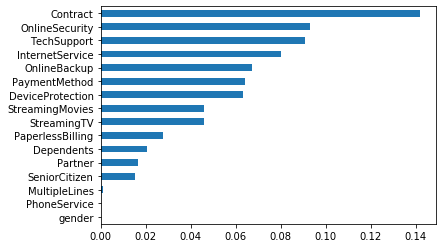

In [40]:
pd.Series(data=entropy_dict).sort_values().plot(kind='barh')

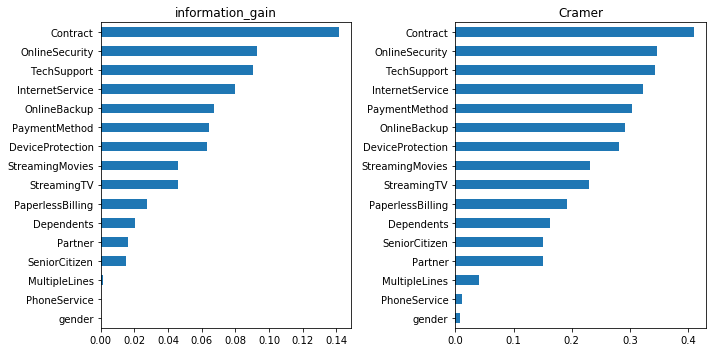

In [41]:
figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
pd.Series(data=entropy_dict).sort_values().plot(kind='barh',title='information_gain')
plt.subplot(1, 2, 2)
pd.Series(data=chi_dict).sort_values().plot(kind='barh',title='Cramer')
plt.tight_layout()


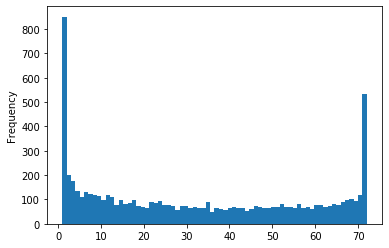

In [42]:
df['tenure'].plot(kind="hist",bins=70)

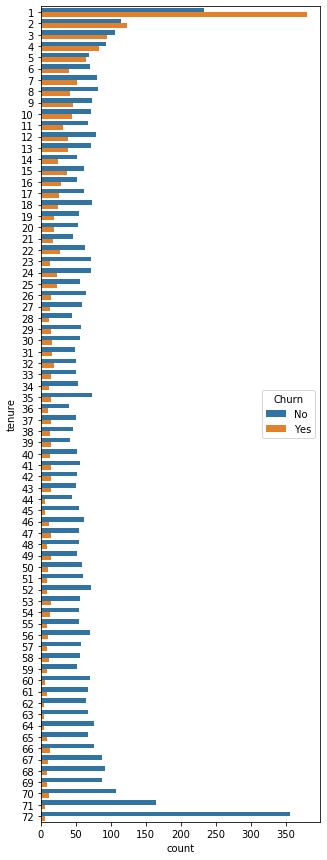

In [43]:
figure(figsize=(5, 15))
sns.countplot(y="tenure", hue="Churn", data=df,orient="h")

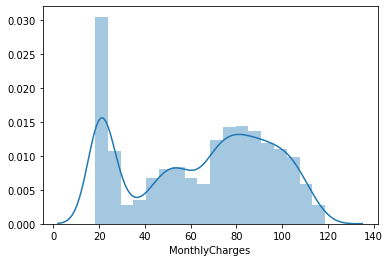

In [44]:
 sns.distplot(df['MonthlyCharges'])

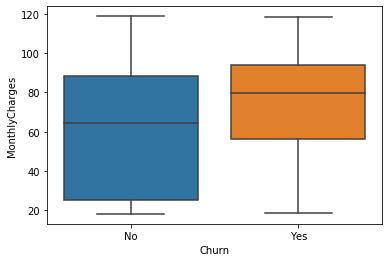

In [45]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

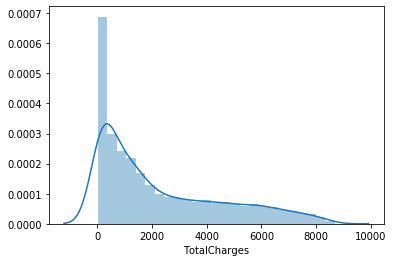

In [46]:
 sns.distplot(df['TotalCharges'])

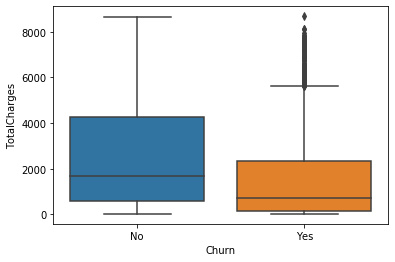

In [47]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)

In [48]:
corr = df.select_dtypes(exclude='object').corr()
corr.style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges
tenure,1,0.246862,0.82588
MonthlyCharges,0.246862,1,0.651065
TotalCharges,0.82588,0.651065,1


In [49]:
charge_tenure=df["TotalCharges"]/df["tenure"]
charge_tenure.corr(df['MonthlyCharges'])

0.9962373123907756

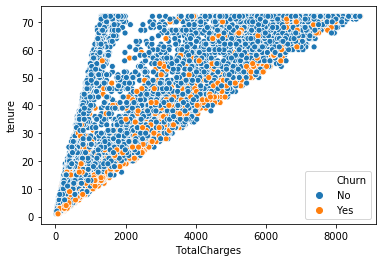

In [50]:
sns.scatterplot(x="TotalCharges", y="tenure", hue="Churn",data=df)

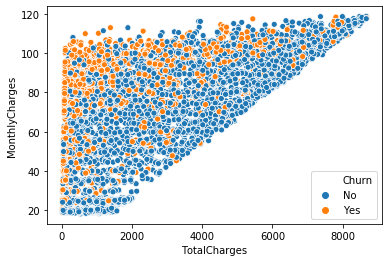

In [51]:
sns.scatterplot(x="TotalCharges", y="MonthlyCharges", hue="Churn",data=df)

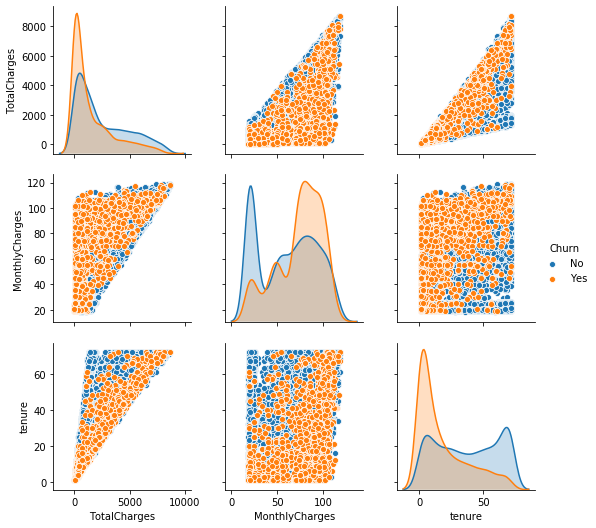

In [52]:
sns.pairplot(df[["TotalCharges","MonthlyCharges","tenure","Churn"]], hue='Churn')

In [53]:
df['charge_tenure']=charge_tenure

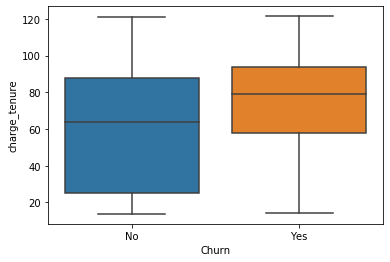

In [54]:
sns.boxplot(x="Churn", y="charge_tenure", data=df)

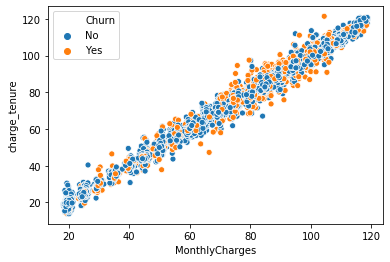

In [55]:
sns.scatterplot(x="MonthlyCharges", y="charge_tenure", hue="Churn",data=df)

In [109]:
df=df.drop(["charge_tenure"],axis=1)

In [110]:
data=df.copy()

In [111]:
data.head(n=2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [112]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [113]:
for cal in categoricals:
    data[cal]=le.fit_transform(data[cal])

In [114]:
num=pd.DataFrame()
numericals=data.select_dtypes(include='float').keys()
numericals

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

((array([-3.72266485, -3.49251099, -3.36591532, ...,  3.36591532,
          3.49251099,  3.72266485]),
  array([ 18.25,  18.4 ,  18.55, ..., 118.6 , 118.65, 118.75])),
 (28.889794524315896, 64.79820819112628, 0.9598378018813334))

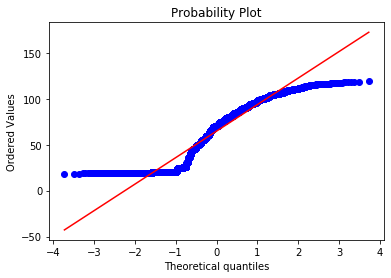

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(data['MonthlyCharges'], dist="norm",plot=ax)

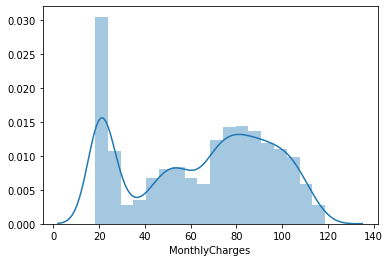

In [116]:
sns.distplot(data['MonthlyCharges'])

In [117]:
from sklearn.preprocessing import StandardScaler
num=StandardScaler().fit_transform(data.select_dtypes(include='float'))
df_num=pd.DataFrame(data=num,columns=numericals)

In [66]:
num.shape

(7032, 3)

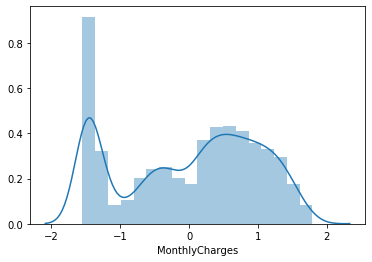

In [118]:
sns.distplot(df_num['MonthlyCharges'])

((array([-3.72266485, -3.49251099, -3.36591532, ...,  3.36591532,
          3.49251099,  3.72266485]),
  array([-1.54728308, -1.54229701, -1.53731095, ...,  1.78839541,
          1.79005744,  1.79338148])),
 (0.9603095788441129, 2.5667113020773166e-18, 0.9598378018813333))

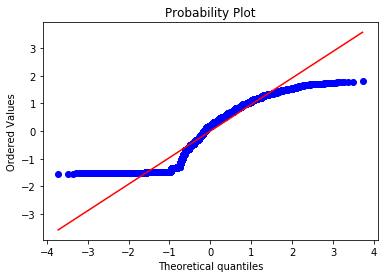

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df_num['MonthlyCharges'], dist="norm",plot=ax)

In [120]:
df_log1p=pd.DataFrame()
for cal in numericals:
    df_log1p[cal]=np.log1p(data[cal])

In [ ]:
df_log1p.head()

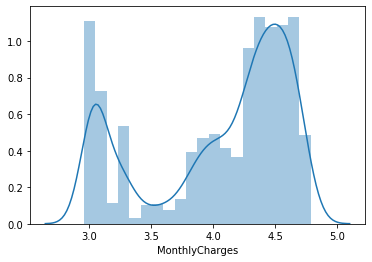

In [121]:
sns.distplot(df_log1p['MonthlyCharges'])

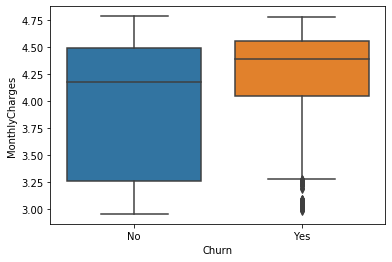

In [122]:
temp_df=pd.concat([data["Churn"],df_log1p['MonthlyCharges']],axis=1)
sns.boxplot(x="Churn", y="MonthlyCharges", data=temp_df)

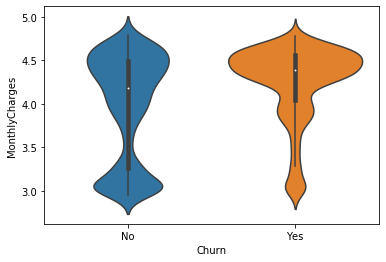

In [123]:
sns.violinplot(x="Churn",y="MonthlyCharges", data=temp_df)

((array([-3.72266485, -3.49251099, -3.36591532, ...,  3.36591532,
          3.49251099,  3.72266485]),
  array([2.95751106, 2.96527307, 2.97297529, ..., 4.78415284, 4.78457081,
         4.78540624])),
 (0.5356767627138697, 4.0440393146575175, 0.9230647615014594))

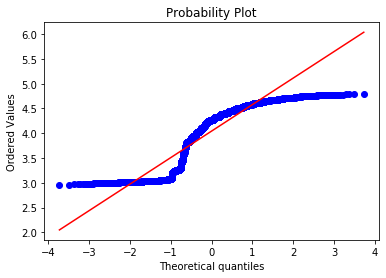

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df_log1p['MonthlyCharges'], dist="norm",plot=ax)

In [158]:
df_yes_log=temp_df[temp_df['Churn']=='Yes']

In [159]:
df_yes_log.head()

,Churn,MonthlyCharges
2,Yes,4.004602
4,Yes,4.272491
5,Yes,4.611649
8,Yes,4.661551
13,Yes,4.651099


In [160]:
df_yes_log['Churn'].unique()

array(['Yes'], dtype=object)

((array([-3.3737217 , -3.12137664, -2.98133372, ...,  2.98133372,
          3.12137664,  3.3737217 ]),
  array([2.98820401, 2.99322914, 2.99573227, ..., 4.77449093, 4.77744141,
         4.78206035])),
 (0.39519243625080036, 4.246192485537899, 0.90445665997643))

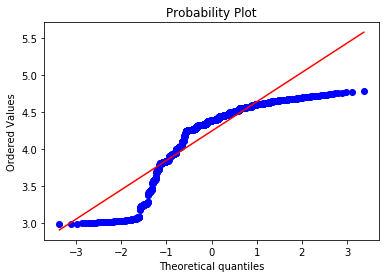

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df_yes_log['MonthlyCharges'], dist="norm",plot=ax)

In [ ]:
import scipy.stats as stats

In [125]:
df_yeojohnson=pd.DataFrame()
for cal in numericals:
    df_yeojohnson[cal]=stats.yeojohnson(data[cal])[0]

In [126]:
df_yeojohnson.head()

,MonthlyCharges,TotalCharges
0,24.944456,5.463912
1,45.657758,22.758430
2,43.331158,9.015914
3,34.574976,22.582189
4,55.876971,10.166043


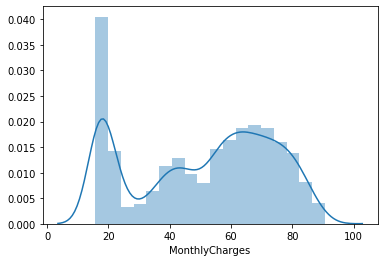

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(df_yeojohnson['MonthlyCharges'])

((array([-3.72266485, -3.49251099, -3.36591532, ...,  3.36591532,
          3.49251099,  3.72266485]),
  array([15.71446491, 15.8359587 , 15.95738565, ..., 90.52804884,
         90.56361891, 90.63475588])),
 (21.617606562078596, 51.09950123345671, 0.9582862402107332))

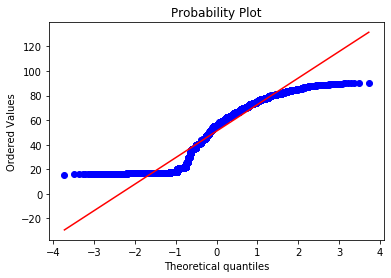

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df_yeojohnson['MonthlyCharges'], dist="norm",plot=ax)

In [129]:
data.head(n=2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,No


In [130]:
missing_data_function(df_num)

,Total,Percent
TotalCharges,0,0.0
MonthlyCharges,0,0.0


In [131]:
df_num.shape

(7032, 2)

In [134]:
data.shape

(7032, 21)

In [135]:
for cal in numericals:
    print(cal)
    data[cal]=df_num[cal] # standarization

MonthlyCharges
TotalCharges


In [137]:
missing_data_function(data)[missing_data_function(data)["Total"]>0]

,Total,Percent
MonthlyCharges,11,0.156428
TotalCharges,11,0.156428


In [138]:
data = data[data["TotalCharges"].notnull()]

In [139]:
missing_data_function(data)[missing_data_function(data)["Total"]>0]

,Total,Percent


In [140]:
X=data.drop(['customerID','Churn'],axis=1)

In [90]:
type(X)

pandas.core.frame.DataFrame

In [91]:
X.shape

(7032, 19)

In [92]:
X.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [141]:
Y=le.fit_transform(data['Churn'])

In [94]:
type(Y)

numpy.ndarray

In [142]:
missing_data_function(X)[missing_data_function(X)["Total"]>0]

,Total,Percent


In [143]:
from sklearn.model_selection import train_test_split

In [144]:
 X_train, X_test, y_train, y_test = train_test_split(X.values, Y, test_size=0.2,stratify=Y,random_state=42)

In [145]:
X_train.shape

(5616, 19)

In [146]:
X_test.shape

(1405, 19)

In [147]:
from sklearn.naive_bayes import GaussianNB

In [149]:
gnb = GaussianNB()

In [150]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [151]:
y_pred = gnb.predict(X_test)

In [152]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7373665480427046
